### Improting libraries

In [1]:
%config IPCompleter.greedy = True
from keras.utils.np_utils import to_categorical
from keras import backend as K
import numpy as np
# import sys
# sys.path.insert(0, 'Devol/')
# from devol import DEvol, GenomeHandler
from genome_handler import GenomeHandler
from devol import DEvol

import matplotlib.pyplot as plt

from Two_Class_MNIST import TwoClassMnist as tcm

/home/alemag/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Getting final data

In [2]:
x_train, x_test, y_train, y_test, input_shape = tcm.returnDataSet(1, 2)
dataset = ((x_train, y_train), (x_test, y_test))
num_classes = 2
X = x_train
Y = y_train

x_train shape: (12700, 28, 28, 1)
12700 train samples
2167 test samples


### sample of class

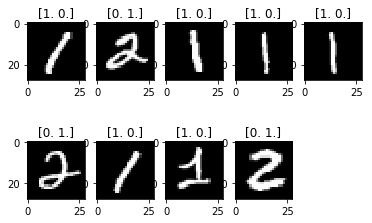

In [3]:
# def display_image(images):
#     # must be in list
#     for image in images:        
#         plt.imshow(image.reshape(28, 28), cmap = plt.cm.binary)
#         plt.show()
# display_image(x_train[:5])
x_train = x_train.reshape(x_train.shape[0], 28, 28)
for i in range(0, 9):
    plt.subplot(250 + (i+1))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])    

### Prepare the genome configuration
The GenomeHandler class handles the constraints that are imposed upon models in a particular genetic program. In this example, a genome is allowed up to 3 convolutional layeres, 3 dense layers, 256 feature maps in each convolution, and 1024 nodes in each dense layer. It also specifies three possible activation functions. See genome-handler.py for more information.

In [4]:
max_conv_layers = 3
max_dense_layers = 3 # including final softmax layer
max_conv_kernals = 128
max_dense_nodes = 128
#input_shape = x_train.shape[1:]
num_classes = 2

genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernals, \
                    max_dense_nodes, input_shape, num_classes)

## Create and run the genetic program
The next, and final, step is create a DEvol and run it. Here we specify a few settings pertaining to the genetic program. In this example, we have 10 generations of evolution, 20 members in each population, and 3 epochs of training used to evaluate each model's fitness. The program will save each genome's encoding, as well as the model's loss and accuracy, in a .csv file printed at the beginning of program.

In [5]:
%%time
num_generations = 3
population_size = 2
num_epochs = 5

devol = DEvol(genome_handler)
model = devol.run(dataset, num_generations, population_size, num_epochs)
model.summary()

model.save('GAMEDC.h5')

Genome encoding and accuracy data stored at Sat Sep  1 10:12:31 2018.csv 


model 1/2 - generation 1/3:

Train on 12700 samples, validate on 2167 samples
Epoch 1/5
12700/12700 [==============================] - 73s 6ms/step - loss: 8.5342 - acc: 0.4696 - val_loss: 8.4421 - val_acc: 0.4762
Epoch 2/5
12700/12700 [==============================] - 74s 6ms/step - loss: 8.5566 - acc: 0.4691 - val_loss: 8.4421 - val_acc: 0.4762
Epoch 00002: early stopping

model 2/2 - generation 1/3:

Train on 12700 samples, validate on 2167 samples
Epoch 1/5
12700/12700 [==============================] - 136s 11ms/step - loss: 0.7154 - acc: 0.5312 - val_loss: 0.6920 - val_acc: 0.5238
Epoch 2/5
12700/12700 [==============================] - 137s 11ms/step - loss: 0.6914 - acc: 0.5304 - val_loss: 0.6921 - val_acc: 0.5238
Epoch 00002: early stopping
Generation 1:		best accuracy: 0.5238		average: 0.5000		std: 0.0238

model 1/2 - generation 2/3:

Train on 12700 samples, validate on 2167 samples
Epoch 1/5
12700/1

### Improting saved csv result

In [11]:
import pandas as pd

df = pd.read_csv("DevolMinstDEvol.csv")
df.head(6)

,Conv0 active,Conv0 num filters,Conv0 batch normalization,Conv0 activation,Conv0 dropout,Conv0 max pooling,Conv1 active,Conv1 num filters,Conv1 batch normalization,Conv1 activation,...,Dense0 activation,Dense0 dropout,Dense1 active,Dense1 num nodes,Dense1 batch normalization,Dense1 activation,Dense1 dropout,Optimizer,Val Loss,Val Accuracy
0,1,16,1,1,0,1,1,128,1,0,...,0,0,0,32,1,0,1,0,8.442104,0.476234
1,1,32,1,0,0,2,1,16,0,1,...,0,0,0,64,0,1,2,0,0.692083,0.523766
2,1,64,1,0,0,2,1,16,0,1,...,0,1,0,64,0,1,2,0,8.442104,0.476234
3,1,16,1,1,0,1,1,128,1,0,...,0,0,0,32,1,0,1,0,7.675992,0.523766
4,1,16,1,1,0,0,1,128,1,0,...,0,0,0,32,1,0,1,0,0.141322,0.991232
5,1,64,1,0,0,2,1,16,0,1,...,0,1,0,64,0,1,2,0,8.442104,0.476234


Text(0,0.5,'Val Loss')

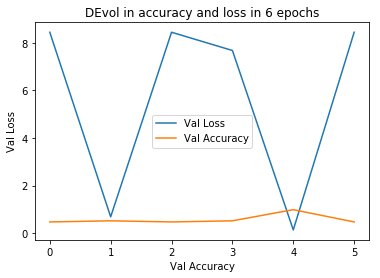

In [15]:
img = df[['Val Loss', 'Val Accuracy']].plot(title='DEvol in accuracy and loss in 6 epochs')
img.set_xlabel("Val Accuracy")
img.set_ylabel("Val Loss")
